# **03-3. 특성 공학과 규제**

### 교재 156페이지

#### **01. 다중 회귀**

여러 개의 특성을 사용한 선형 회귀를 **다중회귀(multiple regression)** 라고 부름.  


농어의 길이뿐만 아니라 농어의 높이와 두께도 함께 사용할 예정이며,  
길이 x 높이 같은 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 **특성 공학(feature engineering)** 이라고 함.

#### **02. 데이터 준비**

**판다스(pandas)** 라이브러리를 이용, **데이터프레임(dataframe)** 구조의 농어 데이터인  
CSV 파일을 인터넷에서 읽어와 사용.

**※ 판다스 데이터프레임을 입력으로 사용하면 넘파이 배열보다 느리지 않나?**  
사이킷런에서 데이터프레임을 입력하면 넘파이 배열로 바꾸어 모델을 훈련하므로 성능차이가 없음.

In [55]:
import pandas as pd
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


농어의 타깃 데이터 준비. (http://bit.ly/perch_data)

In [56]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
        21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
        23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
        27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
        39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
        44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
        115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
        150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
        218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
        556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
        850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
        1000.0])

perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나눔.

In [57]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

#### **03. 사이킷런의 변환기**

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공함.  
이런 클래스를 **변환기(transformer)** 라고 부름. 

(앞서 배운 LinearRegression 같은 모델 클래스는 **추정기(estimator)**라고도 부름.)

모듈에 포함된 polynomialFeatures 클래스 삽입.

In [58]:
from sklearn.preprocessing import PolynomialFeatures

2개의 특성 2와 3으로 이루어진 샘플 하나를 적용해보기.  
fit(), transform() 메서드를 차례대로 호출.

※ PolynomialFeatures 클래스의 fit() 메서드는 특성의 개수를 파악하는 용도가 전부.  
변환(transform)전에 훈련(fit)을 해야 정상작동. 두 메서드를 하나로 붙인 **fit_transform** 메서드도 있음. 

In [59]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


절편에 대한 값 1이 생성됨. 사이킷런의 선형모댈은 자동으로 절편을 추가하므로  
include_dias=False로 지정하여 다시 특성 변환.

굳이 지정하지 않아도 사이킷런 모델은 자동으로 추가된 절편 항을 무시하긴 함.  
예제에서는 보기 편하게 명시적으로 지정한 것.

In [60]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


트레이닝 세트 적용, 변환한 데이터를 train_poly에 저장 후 배열 크기 확인.

In [61]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


get_feature_names_out() 메서드를 이용하여 만들어진 특성들 목록 확인.

In [62]:
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

테스트 세트 적용 후 변환.

In [63]:
test_poly = poly.transform(test_input)

#### **04. 다중 회귀 모델 훈련하기**

LinearRegression 클래스 임포트 후 앞서 만든 train_poly를 이용해 훈련 후 점수 출력.

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


테스트 세트도 출력해보기.

In [65]:
print(lr.score(test_poly, test_target))

0.9714559911594155


특성을 더 많이 추가했을 때의 변화 실습해보기. degree 매개변수를 이용하여 고차항 특성을 만들어 출력.

In [66]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


55개의 특성을 통해 훈련 후 점수 출력해보기.

In [67]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


테스트 점수 출력.

말도 안되는 수치가 나옴을 발견.

특성의 개수를 크게 늘리면 모델은 세트에 과대적합이 되므로 테스트 세트에서 이런 문제 발생.

다시 특성을 줄일 필요성이 생김.

In [68]:
print(lr.score(test_poly, test_target))

-144.40744532797535


#### **05. 규제**

**규제(regularization)** 는 트레이닝 세트를 너무 과도하게 학습하지 못하게 하는 것을 말함.  
선형 회귀 모델에 규제를 추가한 모델 중 대표적으로 **릿지(ridge)** 와 **라쏘(lasso)** 규제가 있음.

릿지는 계수를 제곱한 값을 기준으로 규제를 적용, 라쏘는 계수의 절댓값을 기준으로 규제를 적용함.  
(일반적으로 릿지를 조금 더 선호.)

두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 계수를 아예 0으로 만들 수도 있음.

그 전에 특성의 스케일이 정규화되지 않으면 계수차가 커지기 때문에  
규제를 적용하기 전 정규화 작업 필요.

StandardScaler 변환기 클래스를 이용하여 스케일 조정.

In [69]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#### **06. 릿지 회귀**

sklearn.linear_model 패키지 내에 릿지와 라쏘 모두 포함되어 있음.  
앞서 준비한 train_scaled 데이터로 릿지 모델 훈련 후 점수 출력.

In [70]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [71]:
print(ridge.score(test_scaled, test_target))

0.9790693977615395


과대적합을 해결 후 테스트 세트 점수도 정상 범주 내 출력 확인.  
alpha 매개변수를 이용하여 규제 강도를 조절할 수 있음. (람다 기호로 표현하기도 함.)  
알파 값이 클 수록 규제강도가 세지고 낮을 수록 강도가 약해짐.  
값이 너무 크면 과소적합이 되며 너무 작으면 기존 모델과 유사하게 과대적합될 가능성이 있음.

알파값은 우리가 직접 지정해야 하는 값으로 일종의 **하이퍼파라미터(hyperparameter)** 임.

적절한 알파값을 찾기 위해 맷플롯립을 이용한 알파값에 대한 R^2값의 그래프 출력해보기.  
맷플롯립 임포트, 알파값이 바뀔 때마다 score() 메서드의 결과를 저장할 리스트 생성.

In [72]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

알파값을 0.001부터 100까지 10배 늘려가며 릿지 모델을 훈련한 다음 리스트에 저장.

In [73]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

각 리스트를 그래프로 출력 후 비교.

그런데 알파값들은 0.001 부터 100까지 10배수의 등비수열이기 때문에 스케일 조절 필요.  
맷플롯립의 xscale(), yscale() 함수를 이용하여 스케일 변경이 가능함.  
알파값인 x축을 **로그(log)** 로 스케일을 변경하여 동일한 간격으로 표시되게 수정.

※ 교재에는 없지만 직관성을 위해 plt.legend() 메서드를 이용하여 범례 추가 출력했음.

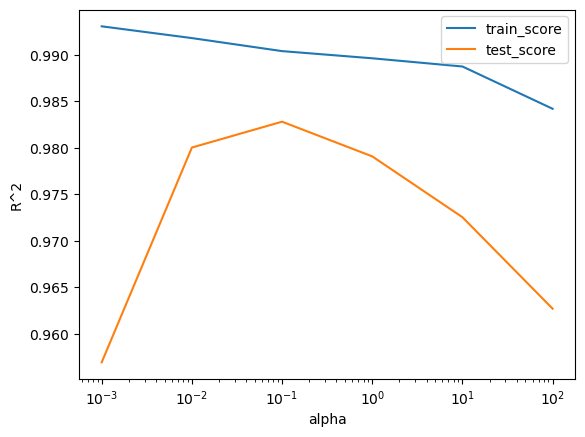

In [74]:
plt.plot(alpha_list, train_score, label = 'train_score')
plt.plot(alpha_list, test_score, label = 'test_score')
plt.legend()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

그래프의 왼쪽(alpha=0.001)은 각 세트의 점수 차이가 아주 큰 과대적합의 모습.  
오른쪽은(alpha=100)은 각 세트의 점수가 모두 낮아지는 과소적합의 모습.

적절한 알파값은 테스트 세트의 점수가 높으며 각 세트의 거리가 가장 가까운 0.1 임을 확인.  
알파값을 0.1로 하여 최종 모델 훈련.

In [75]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386837


### **07. 라쏘 회귀**

Ridge 클래스를 Lasso 클래스로 바꿔 동일한 방법으로 진행.

In [83]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [84]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


동일하게 alpha 매개변수로 규제의 강도를 조절.

**경고 오류가 뜸** - 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산 수행 중  
지정한 반복 횟수가 부족할 때 이런 경고 발생. max_iter 매개변수 값을 이용해 반복 횟수를 조절 가능.  
예제에서는 10000으로 지정했으며, 더 늘릴 수 있지만 예제 상에서는 큰 영향을 끼치진 않음.

In [85]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso .fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\Users\user\anaconda3\envs\mlenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\envs\mlenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


릿지 모델 때와 같이 알파값 x축을 로그스케일로 변경, 그래프 출력.

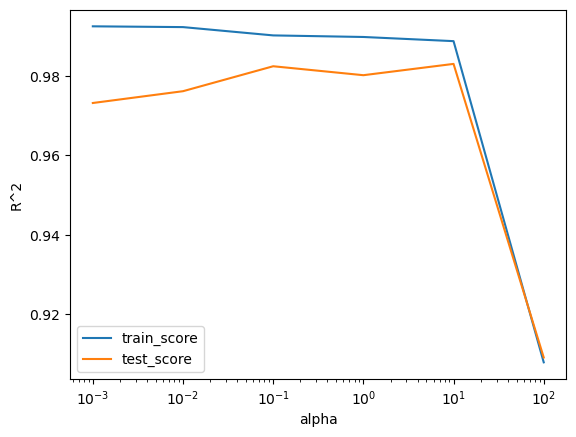

In [86]:
plt.plot(alpha_list, train_score, label = 'train_score')
plt.plot(alpha_list, test_score, label = 'test_score')
plt.legend()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

릿지 모델과 마찬가지로 왼쪽은 과대적합, 오른쪽은 과소적합을 보여주고 중간에 최적의 알파값이 보임.

alpha=10일 때가 가장 최적인 것으로 보여짐. 이 값으로 다시 모델을 훈련.

In [87]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


라쏘 모델은 계수 값을 아예 0으로 만들 수 있으므로 coef_ 속성을 이용하여 계수가 0인 계수를 출력해보기.

In [88]:
print(np.sum(lasso.coef_ == 0))

40


총 55개의 특성 중 40개를 제외한 15개만 사용함. 라쏘 모델은 유용한 특성을 골라내는 용도로도 사용할 수 있음.